In [ ]:
# install if not yet done
using Pkg

# Pkg.add(url="https://github.com/mppmu/BoostFractor.jl.git")
# Pkg.add(url="https://github.com/bergermann/Dragoon.jl.git")
Pkg.update()

    Updating registry at `C:\Users\domin\.julia\registries\General`
┌ Info: The General registry is installed via git. Consider reinstalling it via
│ the newer faster direct from tarball format by running:
│   pkg> registry rm General; registry add General
│ 
└ @ Pkg.Registry C:\Users\domin\.julia\juliaup\julia-1.11.3+0.x64.w64.mingw32\share\julia\stdlib\v1.11\Pkg\src\Registry\Registry.jl:478
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
    Updating git-repo `https://github.com/mppmu/BoostFractor.jl.git`
    Updating git-repo `https://github.com/bergermann/Dragoon.jl.git`
   Installed ImageIO ────────────── v0.6.9
   Installed Libmount_jll ───────── v2.41.0+0
   Installed ImageSegmentation ──── v1.8.4
   Installed GR_jll ─────────────── v0.72.8+0
   Installed PNGFiles ───────────── v0.4.4
   Installed OffsetArrays ───────── v1.17.0
   Installed JpegTurbo ──────────── v0.1.6
   Installed TiffImages ─────────── v0.11.3
   Installed Xorg_xkbcomp_jll ───── v1.4.7+

In [59]:
using Dragoon
using Plots
using HDF5

In [ ]:
n = 4 # number of discs in the booster
f0 = 21.025e9   # 21, 25, 28
ϵ = 9.0
τ = 2e-3

initdist = findpeak1d(f0,n; granularity=10_000,deviation=0.1,thickness=τ,eps=ϵ) # initial disc configuration

freqs = genFreqs(f0,2000e6; n=10) # optimize on these frequencies
freqsplot = genFreqs(f0,10050e6; n=10000) # plot with these frequencies

booster = AnalyticalBooster(initdist; ndisk=n,ϵ=ϵ,τ=τ)  # physical properties of the booster
booster.wavelength = λ(f0)

hist = initHist(booster,1000,freqs,ObjAnalytical); # stores measurements
#                           ^ length, should be at least n

1000-element Vector{State}:
 State([0.0072571290821586325, 0.016514258164317265, 0.0257713872464759, 0.03502851632863453], -0.3008155668197783, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 ⋮
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0, 0.0, 0.0, 0.0], 0.0, Dates.DateTime("0000-01-01T00:00:00"))
 State([0.0

In [48]:
initdist

0.007735119510165748

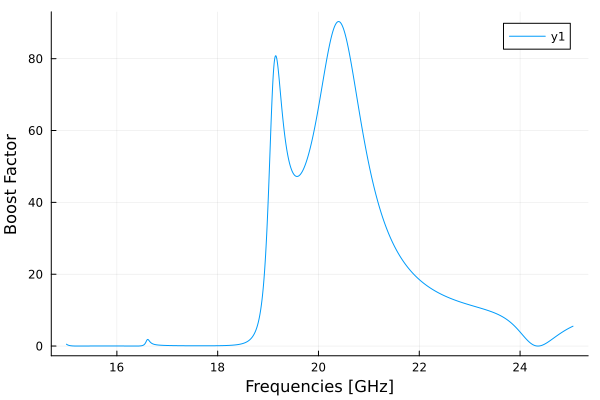

In [51]:
plot(freqsplot/1e9,getBoost1d(booster,freqsplot); ylabel="Boost Factor",xlabel="Frequencies [GHz]")

In [49]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,1e-9,1e-9,
                    ObjAnalytical,
                    InitSimplexRegular(1e-4),
                    DefaultSimplexSampler,
                    UnstuckDont;
                    maxiter=Int(1e5),
                    showtrace=true,
                    showevery=100,
                    unstuckisiter=true,)

Iter: 100, timestamp: 4 minutes, 12 seconds
Iter finished. Objective value: -45.359

2.551199003061796e-6
9.740084952443414e-7
Iter: 200, timestamp: 4 minutes, 49 seconds
Iter finished. Objective value: -48.376

1.5573491467419368e-5
3.432580220564338e-6
Iter: 300, timestamp: 5 minutes
Iter finished. Objective value: -48.941

3.366244203433249e-7
1.3488374289800379e-7
Minimum simplex size reached.
No unstucking tried. Terminating.
Terminated. 352 Iterations.
Final objective value: -48.943
Elapsed movement time:  5 minutes, 1 second
Summed distance:   0.068
Elapsed computing time: 13 milliseconds


353-element Vector{Dragoon.NMTrace}:
 Dragoon.NMTrace([0.007735119510165748 0.007735119510165748 … 0.007735119510165748 0.007685119510165748; 0.01752797404725046 0.017470239020331495 … 0.017470239020331495 0.017441371506872014; 0.027184946115974048 0.027266595774066822 … 0.027205358530497242 0.027184946115974048; 0.03692466665236215 0.03692466665236215 … 0.03700372359386636 0.03692466665236215], [-0.18019451010086415, -0.08382904052580539, -0.056121914891165164, -0.0417593915936496, -0.0046937682578648155], [0.007747619510165748, 0.017477455898696367, 0.02721046163412804, 0.0369444308877382], -0.0839410437740902, Dates.DateTime("0000-01-01T00:00:05.471"), 0.0009355907234194953)
 Dragoon.NMTrace([0.007735119510165748 0.007810119510165748 … 0.007785119510165747 0.007735119510165748; 0.01752797404725046 0.01751354029052072 … 0.017441371506872014 0.017470239020331495; 0.027184946115974048 0.027235977152282032 … 0.027184946115974048 0.027205358530497242; 0.03692466665236215 0.03696419512311

In [ ]:
discnumbers = [4,8] # number of discs in the booster
bandwidths = [10,50,100]
results = []
centerfreqs = [18,21,25,27,30]
ϵ = 9.0
τ = 2e-3
tand = 3e-5

for n in discnumbers
    for cf in centerfreqs
        centerfreq = cf*1e9
        initdist = findpeak1d(centerfreq,n; eps=ϵ,tand=tand,thickness=τ,
            granularity=100_000,deviation=0.2)

        for bw in bandwidths
            if !isdir(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz"))
                mkpath(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz"))
            end

            print("n: $n, cf:$cf GHz, bw: $bw MHz")

            freqs = genFreqs(centerfreq,bw*1e6; n=100)
            freqsplot = genFreqs(centerfreq,200e6; n=1000)

            booster = AnalyticalBooster(initdist; ndisk=n,ϵ=ϵ,tand=tand,τ=τ)

            hist = initHist(booster,100,freqs,ObjAnalytical); # stores measurements

            trace = nelderMead(booster,hist,freqs,
                        1.,1+2/booster.ndisk,0.75-1/2booster.ndisk,1-1/booster.ndisk,1e-12,1e-12,
                        ObjAnalytical,
                        InitSimplexCoord(1e-4),
                        DefaultSimplexSampler,
                        UnstuckDont;
                        maxiter=Int(50_000),
                        traceevery=50_000,
                        showtrace=false,
                        unstuckisiter=true);

            obj = trace[end].obj[1]
            dist = pos2dist(booster.pos; thickness=τ)
            boost = getBoost1d(booster,freqs)
            ref = getRef1d(booster,freqs)

            println(", obj: "obj)
            
            p1 = plot(freqsplot/1e9,getBoost1d(booster,freqsplot); ylabel="Boost Factor β²",xlabel="Frequencies [GHz]")
            p2 = plot(freqsplot/1e9,getRef1d(booster,freqsplot); ylabel="Reflectivity S11",xlabel="Frequencies [GHz]")

            savefig(p1,joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","boost.svg"))
            savefig(p2,joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","ref.svg"))

            if isfile(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","data.h5"))
                rm(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","data.h5"))
            end
            h5write(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","data.h5"),"data/obj",obj)
            h5write(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","data.h5"),"data/distances",dist)
            h5write(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","data.h5"),"data/boost",boost)
            h5write(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","data.h5"),"data/ref",ref)
            h5write(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","data.h5"),"data/freqs",freqs)

            for file in readdir(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz"))
                if occursin(".obj",file); rm(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz",file)); end
            end

            open(joinpath("$(n)discs","$(cf)GHz","$(bw)MHz","$(obj).obj"), "w")
        end
    end
end

n: 4, cf:18 GHz, bw: 10 MHzn: 4, cf:18 GHz, bw: 50 MHzn: 4, cf:18 GHz, bw: 100 MHzn: 4, cf:21 GHz, bw: 10 MHzn: 4, cf:21 GHz, bw: 50 MHzn: 4, cf:21 GHz, bw: 100 MHzn: 4, cf:25 GHz, bw: 10 MHzn: 4, cf:25 GHz, bw: 50 MHzn: 4, cf:25 GHz, bw: 100 MHzn: 4, cf:27 GHz, bw: 10 MHzn: 4, cf:27 GHz, bw: 50 MHzn: 4, cf:27 GHz, bw: 100 MHzn: 4, cf:30 GHz, bw: 10 MHzn: 4, cf:30 GHz, bw: 50 MHzn: 4, cf:30 GHz, bw: 100 MHzn: 8, cf:18 GHz, bw: 10 MHzn: 8, cf:18 GHz, bw: 50 MHzn: 8, cf:18 GHz, bw: 100 MHzn: 8, cf:21 GHz, bw: 10 MHzn: 8, cf:21 GHz, bw: 50 MHzn: 8, cf:21 GHz, bw: 100 MHzn: 8, cf:25 GHz, bw: 10 MHzn: 8, cf:25 GHz, bw: 50 MHzn: 8, cf:25 GHz, bw: 100 MHzn: 8, cf:27 GHz, bw: 10 MHzn: 8, cf:27 GHz, bw: 50 MHzn: 8, cf:27 GHz, bw: 100 MHzn: 8, cf:30 GHz, bw: 10 MHzn: 8, cf:30 GHz, bw: 50 MHzn: 8, cf:30 GHz, bw: 100 MHz